# Searching for REMA strips over Flask Glacier
Some notes on how to search the REMA strip collection and download previews etc. 

In [1]:
import os
import numpy as np
import pdemtools as pdt
import rioxarray
#import geojson
import matplotlib.pyplot as plt
import geopandas
import xarray as xr

## Define ROI with a shapefile I made in qgis

In [2]:
lake = geopandas.read_file("../../../remote sensing/worldview/lake_volume/lake_outline_1.shp")
lake_bounds = lake.to_crs(3031).bounds.values[0]

region = geopandas.read_file("../../../remote sensing/worldview/strips/region_shp/flask_region.shp")
region_bounds = region.to_crs(3031).bounds.values[0]

## Search the REMA strip collection


In [ ]:
gdf = pdt.search(
    dataset='rema',
    bounds = lake_bounds,
#    months = [1,2,3,11,12],
    #years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    baseline_max_hours = 24,
    sensors=['WV03', 'WV02', 'WV01'],
    accuracy=2,
    min_aoi_frac = 0.7,
)

print(f'{len(gdf)} strips found')

16 strips found


In [16]:
gdf

,geometry,gsd,title,created,license,datetime,rmse,proj:bbox,proj:code,published,...,pdt_id,pdt_datetime1,pdt_datetime2,pdt_sat1,pdt_sat2,pdt_dem_baseline_hours,pdt_datetime_mean,pdt_year,pdt_month,pdt_aoi_frac
0,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_W1W2_20120224_10200100189A3800_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2012-02-24T13:50:23Z,-1.000000,"[-2379476, 1220434, -2355464, 1244622]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_W1W2_20120224_10200100189A3800_10...,2012-02-24 13:50:23+00:00,2012-02-24 14:06:51+00:00,WV01,WV02,0.0,2012-02-24 13:58:37+00:00,2012,2,1.000000
1,"POLYGON ((-2371462.49 1225091.082, -2371462.49...",2,SETSM_s2s041_W2W2_20120914_103001001B5D3A00_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2012-09-14T14:11:54Z,0.364900,"[-2440210, 1215042, -2350112, 1264482]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_W2W2_20120914_103001001B5D3A00_10...,2012-09-14 14:11:54+00:00,2012-09-14 14:12:42+00:00,WV02,WV02,0.0,2012-09-14 14:12:18+00:00,2012,9,0.770671
2,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV01_20130222_1020010020A1AC00_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2013-02-22T13:06:08Z,-1.000000,"[-2390126, 1205166, -2369110, 1230572]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV01_20130222_1020010020A1AC00_10...,2013-02-22 13:06:08+00:00,2013-02-22 13:07:02+00:00,WV01,WV01,0.0,2013-02-22 13:06:35+00:00,2013,2,1.000000
3,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV02_20130305_10300100203A2100_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2013-03-05T13:30:37Z,0.175300,"[-2375822, 1219806, -2355106, 1242788]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV02_20130305_10300100203A2100_10...,2013-03-05 13:30:37+00:00,2013-03-05 13:31:49+00:00,WV02,WV02,0.0,2013-03-05 13:31:13+00:00,2013,3,1.000000
4,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV01_20160119_10200100473C9700_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2016-01-19T15:45:20Z,0.753271,"[-2461526, 1196476, -2346276, 1269510]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV01_20160119_10200100473C9700_10...,2016-01-19 15:45:20+00:00,2016-01-19 15:46:26+00:00,WV01,WV01,0.0,2016-01-19 15:45:53+00:00,2016,1,1.000000
5,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV01_20160831_1020010053485200_10...,2021-10-10T00:00:00Z,CC-BY-4.0,2016-08-31T16:33:23Z,0.436807,"[-2457066, 1204012, -2344900, 1275142]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV01_20160831_1020010053485200_10...,2016-08-31 16:33:23+00:00,2016-08-31 16:34:18+00:00,WV01,WV01,0.0,2016-08-31 16:33:50.500000+00:00,2016,8,1.000000
6,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV01_20170302_102001005D619400_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2017-03-02T16:52:43Z,0.332780,"[-2455386, 1208032, -2340208, 1281826]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV01_20170302_102001005D619400_10...,2017-03-02 16:52:43+00:00,2017-03-02 16:53:50+00:00,WV01,WV01,0.0,2017-03-02 16:53:16.500000+00:00,2017,3,1.000000
7,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV02_20180309_103001007A015B00_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2018-03-09T13:59:11Z,0.837963,"[-2437732, 1203228, -2343706, 1263520]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV02_20180309_103001007A015B00_10...,2018-03-09 13:59:11+00:00,2018-03-09 14:00:29+00:00,WV02,WV02,0.0,2018-03-09 13:59:50+00:00,2018,3,1.000000
8,"POLYGON ((-2371462.49 1225072.181, -2371462.49...",2,SETSM_s2s041_WV03_20190401_104001004B017100_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2019-04-01T14:10:34Z,0.566980,"[-2433366, 1213160, -2340764, 1270110]",EPSG:3031,2022-10-19T00:00:00Z,...,SETSM_s2s041_WV03_20190401_104001004B017100_10...,2019-04-01 14:10:34+00:00,2019-04-01 14:11:28+00:00,WV03,WV03,0.0,2019-04-01 14:11:01+00:00,2019,4,0.779756
9,"POLYGON ((-2371462.49 1224399.792, -2371462.49...",2,SETSM_s2s041_WV01_20190408_102001008486B700_10...,2021-10-08T00:00:00Z,CC-BY-4.0,2019-04-08T16:45:45Z,0.37412

In [17]:
for index, row in gdf.iterrows():
    print(row['pdt_datetime_mean'])

2012-02-24 13:58:37+00:00
2012-09-14 14:12:18+00:00
2013-02-22 13:06:35+00:00
2013-03-05 13:31:13+00:00
2016-01-19 15:45:53+00:00
2016-08-31 16:33:50.500000+00:00
2017-03-02 16:53:16.500000+00:00
2018-03-09 13:59:50+00:00
2019-04-01 14:11:01+00:00
2019-04-08 16:46:08.500000+00:00
2019-04-17 16:34:29+00:00
2020-02-21 16:55:23.500000+00:00
2020-03-04 13:48:42.500000+00:00
2020-03-11 13:48:01+00:00
2021-03-22 13:33:39+00:00
2022-02-10 16:55:02.500000+00:00


In [22]:
lake_bounds

array([-2371462.49043929,  1224399.79187731, -2370452.44109719,
        1226261.94848293])

In [23]:
lake_bounds_bigger = (lake_bounds[0] - 1000, lake_bounds[1] - 1000, lake_bounds[2] + 1500, lake_bounds[3] + 1000)

In [29]:
das = []
for i, row in gdf.iterrows():
    da = pdt.load.preview(gdf.iloc[[i]], lake_bounds_bigger, bitmask = False)
    da['date'] = gdf.iloc[[i]].pdt_datetime1.dt.date.values[0]
    das.append(da)



## Get previews of all strips, cropped to the ROI

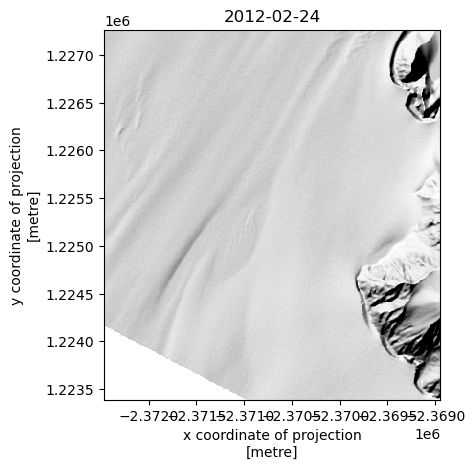

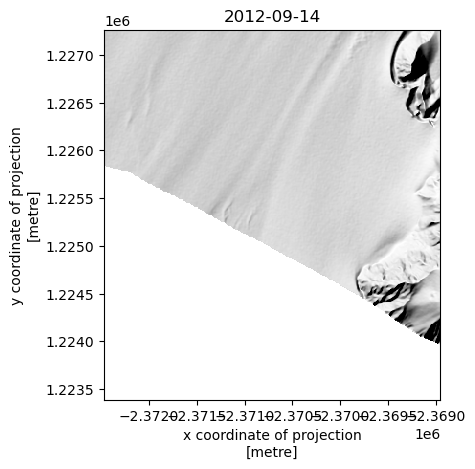

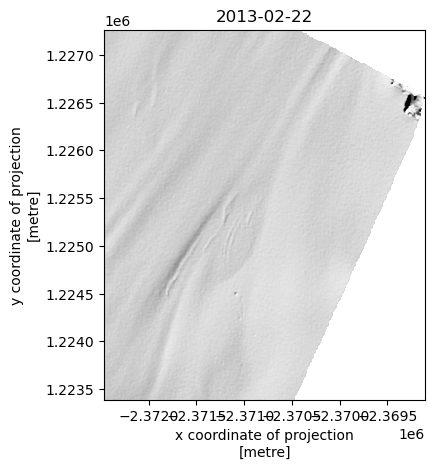

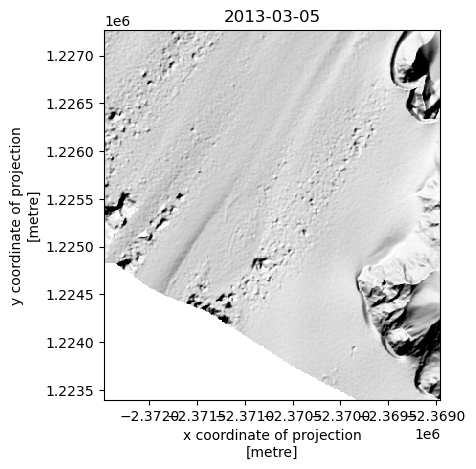

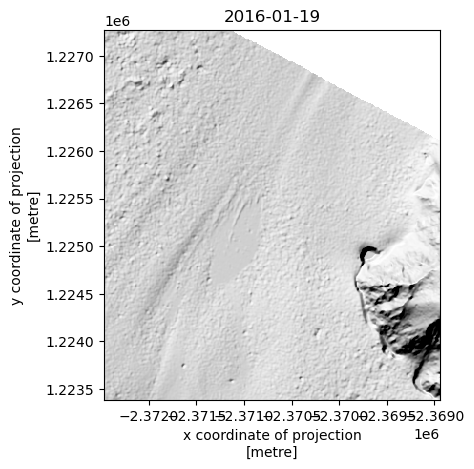

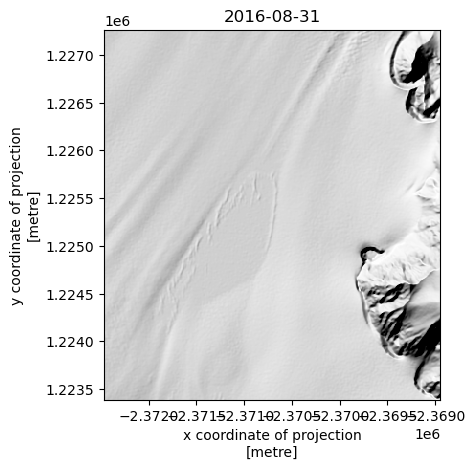

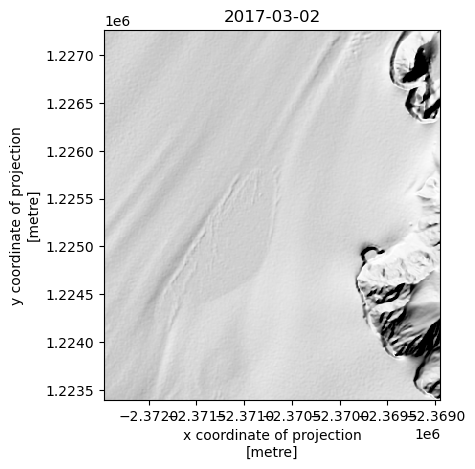

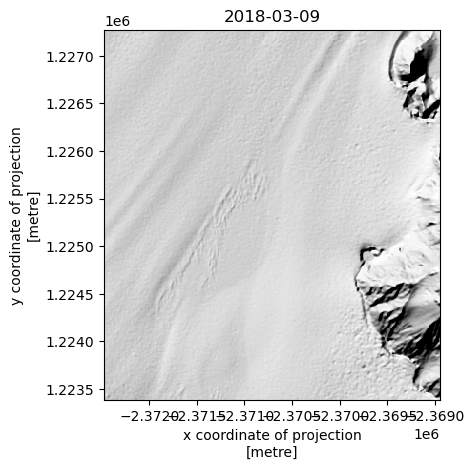

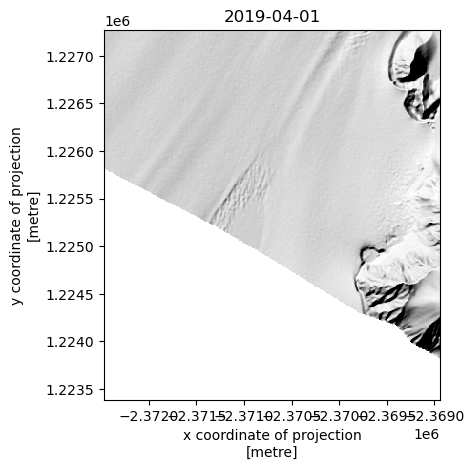

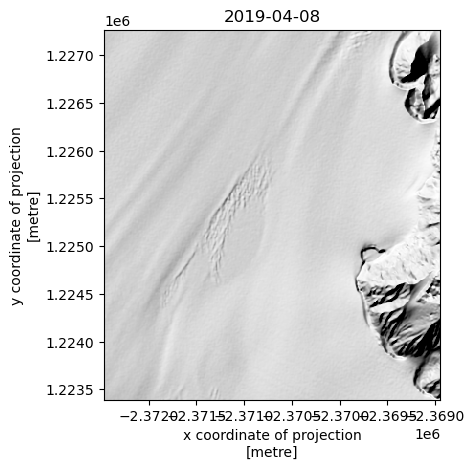

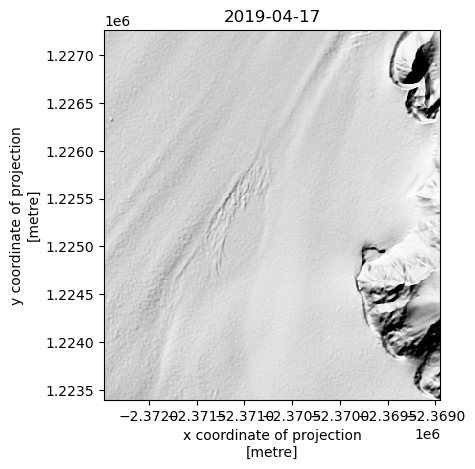

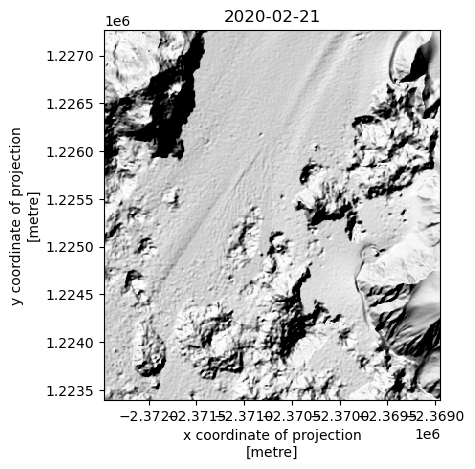

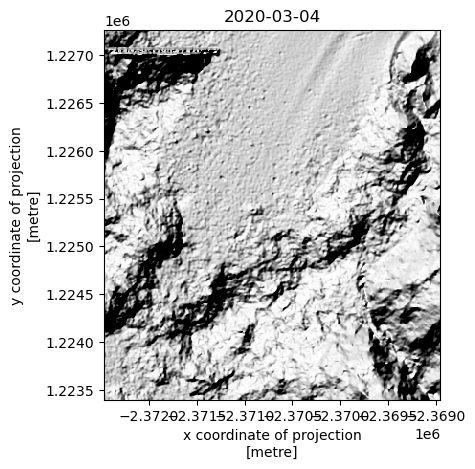

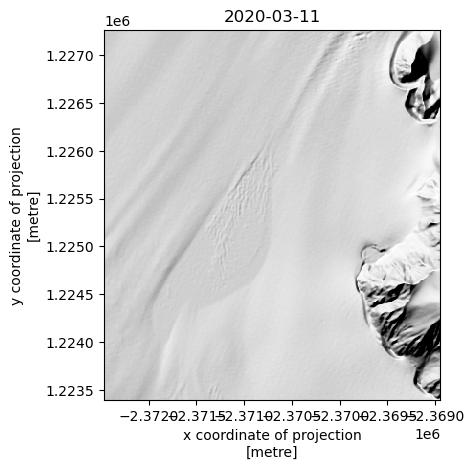

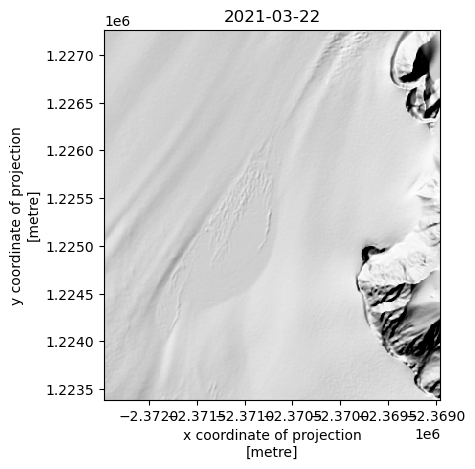

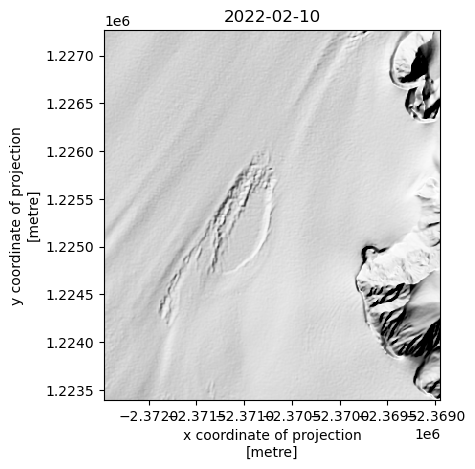

In [30]:
previews = xr.concat(das,dim = 'date')
for da in das:
    plt.figure()
    da.plot.imshow(cmap='Greys_r', add_colorbar=False)
    plt.title(da.date.values)
    # equal aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')

    #plt.close()

In [13]:
gdf.iloc[[i]].href_dem.values[0]

'https://pgc-opendata-dems.s3.us-west-2.amazonaws.com/rema/strips/s2s041/2m/s66w063/SETSM_s2s041_WV01_20220210_10200100BF633900_10200100BFA1C800_2m_lsf_seg1_dem.tif'

In [11]:
dem = rioxarray.open_rasterio(gdf.iloc[[i]].href_dem.values[0])
dem = dem.squeeze()
dem = dem.rio.clip_box(*region_bounds)
dem = dem.where(dem > -9999.0)
dem

<xarray.DataArray (y: 12078, x: 11755)> Size: 568MB
array([[650.90625, 650.8594 , 650.8047 , ...,       nan,       nan,
              nan],
       [651.     , 650.9375 , 650.875  , ...,       nan,       nan,
              nan],
       [651.0703 , 651.0078 , 650.9297 , ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 868.02344, 868.9375 ,
        870.1406 ],
       [      nan,       nan,       nan, ..., 864.7031 , 865.53906,
        866.66406],
       [      nan,       nan,       nan, ..., 861.21875, 861.9219 ,
        862.875  ]], shape=(12078, 11755), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 94kB -2.383e+06 -2.383e+06 ... -2.36e+06 -2.36e+06
  * y            (y) float64 97kB 1.239e+06 1.239e+06 ... 1.215e+06 1.215e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -9999.0

## Dowload strips 

In [ ]:
for i in range(len(gdf)):
    print(row['pdt_datetime_mean'])
    print(row['title'])
    print(i)
    dem = pdt.load.from_search(gdf.iloc[[i]], bounds=region_bounds, bitmask=True)
    out_dir = "../../../remote sensing/worldview/strips/dems/"
    dem.rio.to_raster(out_dir + gdf.iloc[[i]]['title'].item() + '.tif', compress='ZSTD', predictor=3, zlevel=1)

2022-02-10 16:55:02.500000+00:00
SETSM_s2s041_WV01_20220210_10200100BF633900_10200100BFA1C800_2m_lsf_seg1
0
2022-02-10 16:55:02.500000+00:00
SETSM_s2s041_WV01_20220210_10200100BF633900_10200100BFA1C800_2m_lsf_seg1
1
2022-02-10 16:55:02.500000+00:00
SETSM_s2s041_WV01_20220210_10200100BF633900_10200100BFA1C800_2m_lsf_seg1
2
2022-02-10 16:55:02.500000+00:00
SETSM_s2s041_WV01_20220210_10200100BF633900_10200100BFA1C800_2m_lsf_seg1
3


In [123]:
dem_2016

<xarray.DataArray (y: 12078, x: 11755)> Size: 568MB
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 870.3828 , 871.5781 ,
        873.33594],
       [      nan,       nan,       nan, ..., 869.03125, 870.1797 ,
        871.89844],
       [      nan,       nan,       nan, ..., 867.1719 , 868.21875,
        869.8594 ]], shape=(12078, 11755), dtype=float32)
Coordinates:
  * x            (x) float64 94kB -2.383e+06 -2.383e+06 ... -2.36e+06 -2.36e+06
  * y            (y) float64 97kB 1.239e+06 1.239e+06 ... 1.215e+06 1.215e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -9999.0

## Plot hillshade

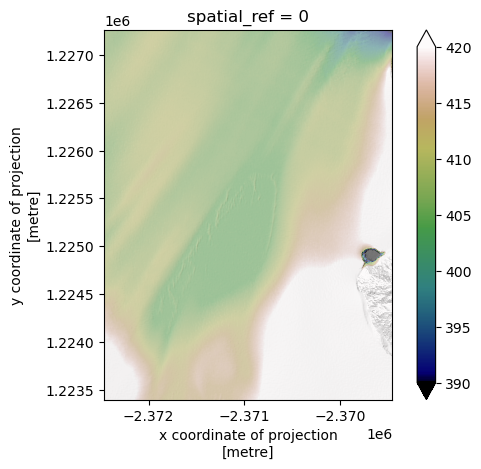

In [105]:
#dem.plot.imshow(cmap='Greys_r', add_colorbar=False, vmin=390, vmax=420)
hillshade_1 = dem.pdt.terrain('hillshade', hillshade_multidirectional=True, hillshade_z_factor=2)
dem.plot.imshow(cmap='gist_earth', vmin=390, vmax=420, add_colorbar=True) # cbar_kwargs={'label': 'Elevation [metres above ellipsoid]'})
hillshade_1.plot.imshow(cmap='Greys_r', alpha=.5,  add_colorbar=False)
plt.gca().set_aspect('equal')#ax.set_title(date_1)

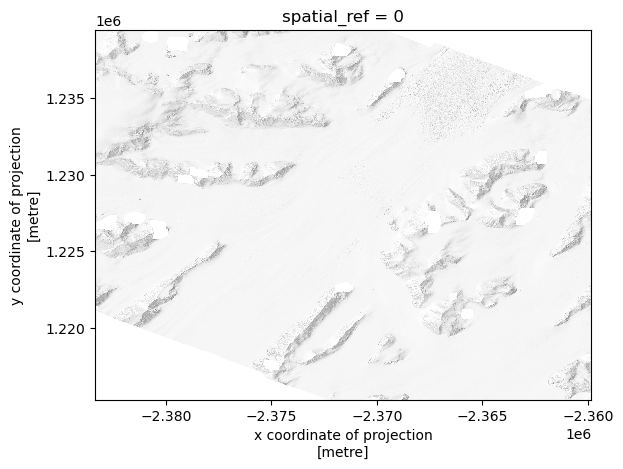

In [14]:
hillshade_1 = dem.pdt.terrain('hillshade', hillshade_multidirectional=True, hillshade_z_factor=2)

hillshade_1.plot.imshow(cmap='Greys_r', alpha=.5,  add_colorbar=False)
